<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요 모듈 불러오기

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


# 데이터 불러오기

In [2]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'   # 자동차 스펙과 가격
df = pd.read_csv(path)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


# Horsepower가 Price에 미치는 효과를 알아보자

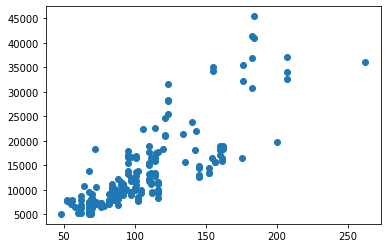

In [ ]:
plt.scatter(x="horsepower", y="price",  data=df)  # Scatter plot


- 효과를 어떻게 설명할 수 있을까?

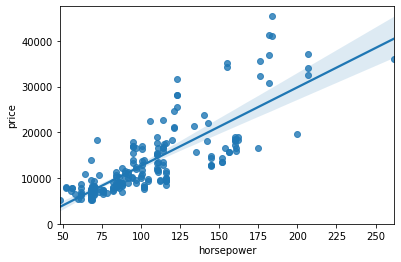

In [ ]:
sns.regplot(x="horsepower", y="price", data=df)
plt.ylim(0,) 
plt.show()
 

- 위 그림의 직선은 무엇을 의미할까?

# 회귀 모형을 돌려보자 
- x변수 하나인 경우 (simple regression) 
- y=a+b*X+e

In [ ]:
import statsmodels.api as sm 

X = df[['horsepower']]
X = sm.add_constant(X)   ## 절편을 추가
y = df['price']

model = sm.OLS(y, X).fit() 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     378.5
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           6.37e-48
Time:                        05:37:41   Log-Likelihood:                -1982.7
No. Observations:                 201   AIC:                             3969.
Df Residuals:                     199   BIC:                             3976.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4597.5583    972.807     -4.726      0.0

# 가격에 영향을 주는 다른 변수의 효과도 고려해 보자 
- x 변수 3개인 경우 (multiple regression, 다중회귀)
- y = a + b1* *x1 + b2 * *x2 + b3** *x3 + e

- 어떤 설명변수를 추가할수 있을까?

In [ ]:
import statsmodels.api as sm 

X = df[['horsepower', 'highway-mpg']]
size = df["length"]*df["height"]*df["width"]
X['size']=size
X = sm.add_constant(X)   ## 절편을 추가

model = sm.OLS(y, X).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           7.92e-59
Time:                        05:52:10   Log-Likelihood:                -1951.0
No. Observations:                 201   AIC:                             3910.
Df Residuals:                     197   BIC:                             3923.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.872e+04   5153.037     -5.573      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# Compare actual vs. model prediction

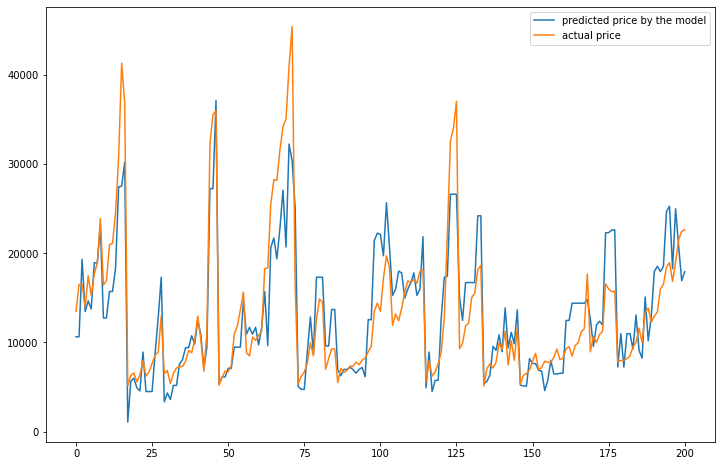

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(model.predict(X), label="predicted price by the model")
plt.plot(y, label="actual price")
plt.legend()
plt.show()

# Prediction error (aka. Residual)

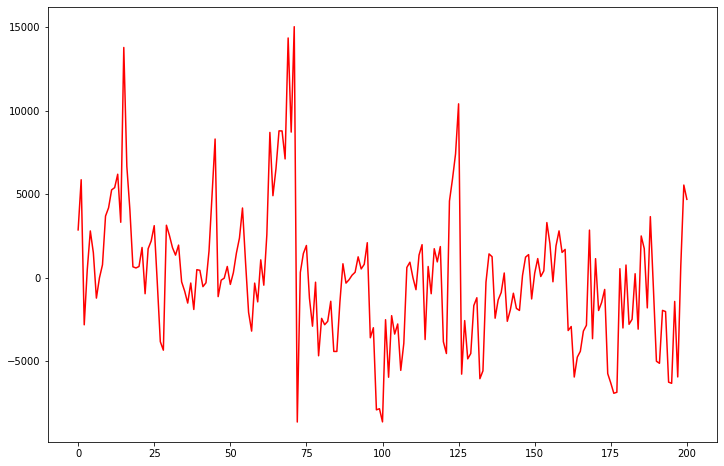

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(model.resid, "r")

# 오차의 제곱합

In [ ]:
sse = np.sum(model.resid**2)
print("Sum of Squared Errors = ",  sse)   ## 해찾기의 목표함수 (이것을 최소화하는 파라미터를 찾는 것)

Sum of Squared Errors =  3173552362.888157
